In [59]:
# Import the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as npl
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


df = pd.read_csv('resources/InningScore_and_WL.csv')
display(df.head(20))

,Team,1,2,3,4,5,6,7,8,9,...,10,11,12,13,14,15,16,17,18,19
0,STL,0,0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PIT,0,2,0,0,0,1,0,1,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TOR,2,0,0,1,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TB,0,0,1,0,0,0,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NYM,0,0,0,0,0,0,0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,KC,1,0,0,1,0,2,0,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,SF,0,2,2,1,2,0,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MIL,1,1,1,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MIN,0,0,0,0,0,0,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BAL,0,0,0,0,2,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Section 1: Data Exploration
Review Headings, missing data, types of data

In [60]:
# What is the datafame shape?  What are the data column headings?
display(df.columns)
display(df.shape)
display(df.count())
df.columns

Index(['Team', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'R', 'H', 'E',
       'R-9', 'W-L', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score_5',
       'Score_6', 'Score_7', 'Score_8', 'Score_9', 'delta_1', 'delta_2',
       'delta_3', 'delta_4', 'delta_5', 'delta_6', 'delta_7', 'delta_8',
       'delta_9', 'Game_ID', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19'],
      dtype='object')

(26868, 44)

Team       26868
1          26868
2          26868
3          26868
4          26868
5          26868
6          26868
7          26868
8          26868
9          26868
R          26868
H          26868
E          26868
R-9        26868
W-L        26868
Score_1    26868
Score_2    26868
Score_3    26868
Score_4    26868
Score_5    26868
Score_6    26868
Score_7    26868
Score_8    26868
Score_9    26868
delta_1    26868
delta_2    26868
delta_3    26868
delta_4    26868
delta_5    26868
delta_6    26868
delta_7    26868
delta_8    26868
delta_9    26868
Game_ID    26868
10          2196
11          1070
12           536
13           288
14           140
15            90
16            54
17            26
18            18
19             6
dtype: int64

Index(['Team', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'R', 'H', 'E',
       'R-9', 'W-L', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score_5',
       'Score_6', 'Score_7', 'Score_8', 'Score_9', 'delta_1', 'delta_2',
       'delta_3', 'delta_4', 'delta_5', 'delta_6', 'delta_7', 'delta_8',
       'delta_9', 'Game_ID', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19'],
      dtype='object')

### Legend for Columns
Each one is one team's results.  There are two rows for each game.
The single digit columns '1' through '19' are the runs scored that inning by
that team.  Columns greater than '9' are extra innings.
The R-H-E columns are runs hits errors for the game (total).
The "Score_1" and similar are the total runs for the game UP TO that inning.
This means that "Score_4" is the sum of '1', '2', '3', and '4'.
The 'delta_1' and similar indicate the points ahead (+) or points behind (-)
that inning for that team compared to the opposing team.
The 'W-L' column is whether the team won or lost.

In [61]:
# How many unique game IDs are there?
how_many_games = df['Game_ID'].nunique()
how_many_games

13418

In [62]:
# Find the percentage of null values in each column.
df.isna().sum()/len(df)

Team       0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
5          0.000000
6          0.000000
7          0.000000
8          0.000000
9          0.000000
R          0.000000
H          0.000000
E          0.000000
R-9        0.000000
W-L        0.000000
Score_1    0.000000
Score_2    0.000000
Score_3    0.000000
Score_4    0.000000
Score_5    0.000000
Score_6    0.000000
Score_7    0.000000
Score_8    0.000000
Score_9    0.000000
delta_1    0.000000
delta_2    0.000000
delta_3    0.000000
delta_4    0.000000
delta_5    0.000000
delta_6    0.000000
delta_7    0.000000
delta_8    0.000000
delta_9    0.000000
Game_ID    0.000000
10         0.918267
11         0.960176
12         0.980051
13         0.989281
14         0.994789
15         0.996650
16         0.997990
17         0.999032
18         0.999330
19         0.999777
dtype: float64

### Null Values in Data
Note that the null values are for "extra innings".  More than 92% of games did
not end with "extra innings". 98% of games ended by 12 innings, with only 2%
of games having between 13 and 19 innings.  Because of the low sample of games
without extra innings, this model will address only games ending in 9 innings.
Remove columns "10" through "19".

In [63]:
# Review Data by Columns
df['W-L'].value_counts()

W-L
L    12328
W    12328
E     2212
Name: count, dtype: int64

### Games with Extra Innings
The 2,212 games with "E" above are extra innings.  Remove rows with "E" later.

In [64]:
# Review the data in the dataframe
df.describe()

,1,2,3,4,5,R,H,E,R-9,Score_1,...,10,11,12,13,14,15,16,17,18,19
count,26868.000000,26868.000000,26868.000000,26868.000000,26868.000000,26868.000000,26868.000000,26868.000000,26868.000000,26868.000000,...,2196.000000,1070.000000,536.000000,288.000000,140.000000,90.000000,54.000000,26.000000,18.000000,6.000000
mean,0.559402,0.463153,0.528621,0.530631,0.534353,4.589214,8.478822,0.576522,4.501712,0.559402,...,0.560565,0.515888,0.488806,0.496528,0.392857,0.611111,0.611111,0.269231,0.555556,0.500000
std,1.064038,0.999135,1.056892,1.055602,1.060974,3.218574,3.445566,0.792821,3.209285,1.064038,...,0.971799,0.993538,0.937219,0.867526,0.862458,1.196384,1.122945,0.827415,0.855585,0.547723
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,8.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,11.000000,1.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.250000,1.000000,1.000000,0.000000,1.000000,1.000000
max,12.000000,11.000000,12.000000,10.000000,13.000000,29.000000,28.000000,6.000000,29.000000,12.000000,...,7.000000,7.000000,6.000000,7.000000,6.000000,7.000000,5.000000,4.000000,3.000000,1.000000


In [65]:
# Review data by Columns
columns_var = ['Team', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'R', 'H', 'E',
       'R-9', 'W-L', 'Score_1', 'Score_2', 'Score_3', 'Score_4', 'Score_5',
       'Score_6', 'Score_7', 'Score_8', 'Score_9', 'delta_1', 'delta_2',
       'delta_3', 'delta_4', 'delta_5', 'delta_6', 'delta_7', 'delta_8',
       'delta_9', 'Game_ID', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19']
for i in columns_var:
    display(df[i].value_counts())

Team
LAD    957
HOU    953
NYY    915
CHC    915
ATL    915
TB     914
WSH    909
BOS    909
CLE    905
MIL    901
TOR    892
STL    891
SF     891
CHW    889
SD     886
OAK    885
ARI    884
LAA    884
TEX    883
COL    883
CIN    882
MIN    882
NYM    882
BAL    881
MIA    881
SEA    879
KC     879
PHI    878
PIT    877
DET    876
NL       5
AL       5
Name: count, dtype: int64

1
0     18684
1      4313
2      2118
3      1018
4       445
5       181
6        63
7        28
8         6
10        5
9         4
11        2
12        1
Name: count, dtype: int64

2
0     19976
1      3836
2      1691
3       746
4       329
5       163
6        70
7        35
8        12
9         6
10        2
11        2
Name: count, dtype: int64

3
0     19235
1      4002
2      1960
3       928
4       427
5       198
6        61
7        37
8        11
9         6
10        2
12        1
Name: count, dtype: int64

4
0     19117
1      4134
2      2011
3       881
4       408
5       174
6        81
7        36
8        18
9         6
10        2
Name: count, dtype: int64

5
0     19115
1      4102
2      1984
3       929
4       414
5       191
6        82
7        29
8        12
9         6
10        2
13        1
11        1
Name: count, dtype: int64

6
0     19110
1      4118
2      1922
3       950
4       431
5       180
6        78
7        44
-        14
8        10
9         6
10        5
Name: count, dtype: int64

7
0     19431
1      3861
2      1842
3       884
4       408
5       174
-       125
6        81
7        34
8        14
9         7
11        4
10        3
Name: count, dtype: int64

8
0     19327
1      3738
2      1757
3       871
-       466
4       393
5       189
6        62
7        38
8        17
9         8
11        1
10        1
Name: count, dtype: int64

9
0     15066
-      6446
1      3044
2      1321
3       563
4       261
5       105
6        40
7        18
8         3
10        1
Name: count, dtype: int64

R
3     3675
2     3448
4     3403
5     3129
1     2782
6     2432
7     1925
0     1572
8     1410
9      923
10     732
11     510
12     331
13     211
14     150
15      83
16      55
17      39
18      17
19      17
20       7
21       6
23       3
22       3
24       3
25       1
29       1
Name: count, dtype: int64

H
8     3180
7     3142
9     3037
6     2905
10    2521
5     2262
11    2048
4     1574
12    1497
13    1031
3      892
14     816
15     517
2      394
16     355
17     230
18     144
1      105
19      91
20      43
21      27
0       22
22      17
23       7
25       4
24       3
27       2
28       1
26       1
Name: count, dtype: int64

E
0    15498
1     8133
2     2497
3      614
4      110
5       15
6        1
Name: count, dtype: int64

R-9
3     3740
2     3535
4     3462
5     3038
1     2943
6     2328
7     1849
0     1626
8     1352
9      887
10     709
11     502
12     324
13     198
14     144
15      81
16      54
17      38
18      17
19      17
20       7
21       6
23       3
22       3
24       3
25       1
29       1
Name: count, dtype: int64

W-L
L    12328
W    12328
E     2212
Name: count, dtype: int64

Score_1
0     18684
1      4313
2      2118
3      1018
4       445
5       181
6        63
7        28
8         6
10        5
9         4
11        2
12        1
Name: count, dtype: int64

Score_2
0     13893
1      6010
2      3360
3      1719
4       880
5       489
6       256
7       133
8        55
9        38
10       21
11        7
12        5
13        2
Name: count, dtype: int64

Score_3
0     10245
1      6181
2      4150
3      2541
4      1628
5       975
6       525
7       293
8       151
9        92
10       47
11       20
12        8
13        8
14        2
15        1
16        1
Name: count, dtype: int64

Score_4
0     7276
1     5981
2     4788
3     3236
4     2128
5     1437
6      803
7      512
8      289
9      185
10     118
11      49
12      29
13      17
14       8
15       4
16       4
17       3
18       1
Name: count, dtype: int64

Score_5
1     5418
0     5392
2     4666
3     3586
4     2596
5     1894
6     1301
7      788
8      497
9      292
10     181
11     106
12      64
13      34
14      23
15      12
17       7
16       5
19       4
22       1
18       1
Name: count, dtype: int64

Score_6
1          4715
2          4538
3          3856
0          3837
4          3046
5          2247
6          1619
7          1035
8           741
9           421
10          318
11          192
12          113
13           68
14           51
15           21
#VALUE!      14
17           13
16           12
19            4
18            3
21            1
20            1
25            1
22            1
Name: count, dtype: int64

Score_7
2          4250
1          4075
3          3812
4          3190
0          2832
5          2551
6          1885
7          1344
8           995
9           586
10          456
11          295
12          170
#VALUE!     125
13          108
14           80
15           43
16           27
17           16
18            9
19            8
21            5
20            4
29            1
22            1
Name: count, dtype: int64

Score_8
3          3759
2          3703
1          3369
4          3274
5          2780
0          2122
6          2122
7          1570
8          1184
9           767
10          605
#VALUE!     466
11          423
12          253
13          172
14          116
15           70
16           37
17           24
18           19
19           10
20            9
21            5
23            3
22            3
25            1
24            1
29            1
Name: count, dtype: int64

Score_9
3     3740
2     3535
4     3462
5     3038
1     2943
6     2328
7     1849
0     1626
8     1352
9      887
10     709
11     502
12     324
13     198
14     144
15      81
16      54
17      38
18      17
19      17
20       7
21       6
23       3
22       3
24       3
25       1
29       1
Name: count, dtype: int64

delta_1
 0     13852
-1      3460
 1      3460
 2      1657
-2      1657
-3       823
 3       823
-4       346
 4       346
-5       146
 5       146
-6        40
 6        40
-7        19
 7        19
-8         6
 8         6
 10        6
-10        6
 9         3
-9         3
-12        1
 12        1
 11        1
-11        1
Name: count, dtype: int64

delta_2
 0     9048
-1     4193
 1     4193
-2     2218
 2     2218
-3     1197
 3     1197
 4      630
-4      630
 5      314
-5      314
-6      179
 6      179
-7       89
 7       89
-8       40
 8       40
-9       30
 9       30
 10      11
-10      11
 11       5
-11       5
-13       2
 13       2
-12       2
 12       2
Name: count, dtype: int64

delta_3
 0     6346
 1     3995
-1     3995
-2     2542
 2     2542
 3     1520
-3     1520
 4      988
-4      988
-5      518
 5      518
-6      347
 6      347
-7      147
 7      147
 8      100
-8      100
 9       53
-9       53
-10      29
 10      29
 11      10
-11      10
-13       6
 13       6
-12       5
 12       5
 14       1
-14       1
Name: count, dtype: int64

delta_4
 0     4816
 1     3725
-1     3725
-2     2686
 2     2686
 3     1743
-3     1743
 4     1094
-4     1094
 5      719
-5      719
 6      444
-6      444
-7      251
 7      251
 8      160
-8      160
 9       91
-9       91
-10      51
 10      51
 11      27
-11      27
-12      21
 12      21
-13       6
 13       6
-17       2
-15       2
 17       2
 14       2
 16       2
-16       2
-14       2
 15       2
Name: count, dtype: int64

delta_5
 0     3816
-1     3399
 1     3399
-2     2657
 2     2657
 3     1826
-3     1826
 4     1306
-4     1306
 5      840
-5      840
-6      574
 6      574
 7      369
-7      369
-8      227
 8      227
 9      142
-9      142
 10      68
-10      68
-11      53
 11      53
-12      27
 12      27
-13      15
 13      15
 14      13
-14      13
 15       4
 16       4
-15       4
-16       4
-18       1
 18       1
-19       1
 19       1
Name: count, dtype: int64

delta_6
0          3252
-1         3058
1          3058
2          2588
-2         2588
-3         1887
3          1887
-4         1402
4          1402
-5          981
5           981
6           664
-6          664
-7          430
7           430
-8          296
8           296
-9          199
9           199
-10         110
10          110
11           70
-11          70
12           48
-12          48
-13          30
13           30
#VALUE!      20
-14          16
14           16
-15          10
15           10
-16           4
16            4
-17           3
17            3
-18           1
18            1
-19           1
19            1
Name: count, dtype: int64

delta_7
0          2836
-1         2758
1          2758
2          2412
-2         2412
-3         1856
3          1856
-4         1478
4          1478
-5         1079
5          1079
6           768
-6          768
-7          555
7           555
-8          372
8           372
-9          228
9           228
#VALUE!     222
10          156
-10         156
-11          80
11           80
-12          52
12           52
13           43
-13          43
14           33
-14          33
-15          13
15           13
-16           9
16            9
18            4
-18           4
-17           4
17            4
-19           3
19            3
-20           2
20            2
Name: count, dtype: int64

delta_8
0          2552
-1         2482
1          2482
-2         2248
2          2248
-3         1825
3          1825
-4         1560
4          1560
-5         1137
5          1137
6           833
-6          833
-7          584
7           584
#VALUE!     470
8           434
-8          434
-9          295
9           295
-10         180
10          180
11          116
-11         116
-12          78
12           78
13           54
-13          54
14           40
-14          40
15           22
-15          22
-16          14
16           14
-19           6
19            6
-17           5
17            5
-18           5
18            5
-20           3
20            3
-24           1
24            1
-21           1
21            1
Name: count, dtype: int64

delta_9
-1     2903
 1     2903
 2     2221
-2     2221
 0     2212
-3     1860
 3     1860
-4     1523
 4     1523
 5     1142
-5     1142
 6      804
-6      804
 7      617
-7      617
 8      410
-8      410
 9      290
-9      290
-10     193
 10     193
-11     123
 11     123
-12      76
 12      76
-13      65
 13      65
 14      40
-14      40
 15      24
-15      24
-16      13
 16      13
-17       7
 17       7
-18       7
 18       7
-19       4
 19       4
-21       3
 21       3
 20       3
-20       3
Name: count, dtype: int64

Game_ID
401075755    4
401228439    4
401228203    4
401227780    4
401227183    4
            ..
370830129    2
370830103    2
370831117    2
370831109    2
401361981    2
Name: count, Length: 13418, dtype: int64

10
0.0    1424
1.0     504
2.0     151
3.0      71
4.0      30
6.0       8
5.0       6
7.0       2
Name: count, dtype: int64

11
0.0    731
1.0    228
2.0     55
3.0     30
4.0     15
5.0      6
7.0      4
6.0      1
Name: count, dtype: int64

12
0.0    377
1.0     98
2.0     36
3.0     13
4.0      8
5.0      3
6.0      1
Name: count, dtype: int64

13
0.0    190
1.0     69
2.0     18
3.0      9
4.0      1
7.0      1
Name: count, dtype: int64

14
0.0    105
1.0     23
2.0      8
3.0      2
4.0      1
6.0      1
Name: count, dtype: int64

15
0.0    62
1.0    14
2.0     7
3.0     5
5.0     1
7.0     1
Name: count, dtype: int64

16
0.0    38
1.0     6
2.0     5
3.0     4
5.0     1
Name: count, dtype: int64

17
0.0    22
1.0     3
4.0     1
Name: count, dtype: int64

18
0.0    11
1.0     5
2.0     1
3.0     1
Name: count, dtype: int64

19
1.0    3
0.0    3
Name: count, dtype: int64

In [66]:
# Team Titles Include "AL" and "NL". Look for "AL" and "NL" scores 
# This is likely All Star Games
filtered_df = df[df['Team'] == "AL"]
display(filtered_df)
filtered_df = df[df['Team'] == "NL"]
display(filtered_df)
# Remove these rows later.

,Team,1,2,3,4,5,6,7,8,9,...,10,11,12,13,14,15,16,17,18,19
2673,AL,0,3,1,0,0,0,0,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7622,AL,0,0,0,0,1,0,0,0,0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12820,AL,0,1,1,0,0,0,0,3,0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17769,AL,0,1,0,0,1,0,2,0,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24622,AL,0,1,1,0,2,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Team,1,2,3,4,5,6,7,8,9,...,10,11,12,13,14,15,16,17,18,19
2672,NL,1,0,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7623,NL,0,0,0,0,0,1,0,0,0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12821,NL,0,0,1,0,0,0,1,1,2,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17768,NL,0,0,0,0,0,1,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24623,NL,0,0,0,0,1,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Notes on Column Data Review Above
1. The team titles include a set of "AL" and "NL".  This is likely the All Star 
    Game.  Remove these rows from the data.

2.  "R-9" and score_9 are the same.  delete R-9.
    
3.  Remove games with extra innings.  These are rows with "E" in the Win Lost
    column.  Remove extra innings row 10 through 19.
    
4.  Innings 6 through 9 have a "-" in them.  This is likely a suspended game or
    error for innings 6 through 8.  It could be a home game lead with game
    ending after Top of the 9th.  Remove all rows with "-" in innings 6 through
    8, and replace "-" with "0" for the 9th Inning Rows.  Also, check and
    correct data for 9th inning rows at the score after each inning and lead
    after each inning.

5.  Scores in 6, 7, and 8, and Delta Score/Lead/Behind 6,7, and 8 have a "value"
    error.  This may be resolved with removing rows for "-" in Item No. 2.  
    Check after correcting Item No. 3.
6.  '1' which is Runs in the First and 'Score_1' are the same value. Delete '1'.

## Section 2: Cleaning Data

In [67]:
# Duplicate df
df_clean_1 = df.copy()
display(df_clean_1.head())

,Team,1,2,3,4,5,6,7,8,9,...,10,11,12,13,14,15,16,17,18,19
0,STL,0,0,0,0,0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PIT,0,2,0,0,0,1,0,1,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TOR,2,0,0,1,0,0,0,2,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TB,0,0,1,0,0,0,0,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NYM,0,0,0,0,0,0,0,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Delete all rows with "AL" or "NL" as a Team (All Star Games)
# Source:  https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/
indexTeam = df_clean_1[(df_clean_1['Team'] == 'AL') | (df_clean_1['Team'] == 'NL') ].index
df_clean_1.drop(indexTeam, inplace=True)
# Verify AL and NL removed
display(df_clean_1['Team'].value_counts())

Team
LAD    957
HOU    953
NYY    915
CHC    915
ATL    915
TB     914
BOS    909
WSH    909
CLE    905
MIL    901
TOR    892
STL    891
SF     891
CHW    889
SD     886
OAK    885
LAA    884
ARI    884
TEX    883
COL    883
CIN    882
MIN    882
NYM    882
BAL    881
MIA    881
SEA    879
KC     879
PHI    878
PIT    877
DET    876
Name: count, dtype: int64

In [69]:
# Delete Extra Innings Games
indexExtra = df_clean_1[(df_clean_1['W-L'] == 'E')].index
df_clean_1.drop(indexExtra, inplace=True)
# Verify E removed
display(df_clean_1['W-L'].value_counts())

W-L
L    12325
W    12325
Name: count, dtype: int64

In [70]:
# Drop columns not used in model or redundant values
df_clean_2 = df_clean_1.drop(columns=['Team','Game_ID','R','H','E','R-9','1','10','11','12','13','14','15','16','17','18','19']).copy()
display(df_clean_2.head(15))

,2,3,4,5,6,7,8,9,W-L,Score_1,...,Score_9,delta_1,delta_2,delta_3,delta_4,delta_5,delta_6,delta_7,delta_8,delta_9
0,0,0,0,0,0,0,0,1,L,0,...,1,0,-2,-2,-2,-2,-3,-3,-4,-3
1,2,0,0,0,1,0,1,-,W,0,...,4,0,2,2,2,2,3,3,4,3
2,0,0,1,0,0,0,2,0,W,2,...,5,2,2,1,2,2,2,2,4,2
3,0,1,0,0,0,0,0,2,L,0,...,3,-2,-2,-1,-2,-2,-2,-2,-4,-2
4,0,0,0,0,0,0,3,0,L,0,...,3,-1,-1,-1,-2,-2,-4,-4,-1,-1
5,0,0,1,0,2,0,0,-,W,1,...,4,1,1,1,2,2,4,4,1,1
6,2,2,1,2,0,0,5,0,W,0,...,12,-1,0,1,2,4,4,4,9,9
7,1,1,0,0,0,0,0,0,L,1,...,3,1,0,-1,-2,-4,-4,-4,-9,-9
8,0,0,0,0,0,2,0,0,L,0,...,2,0,0,0,0,-2,-2,0,0,-1
9,0,0,0,2,0,0,0,1,W,0,...,3,0,0,0,0,2,2,0,0,1


In [71]:
# Look for Data with "-" In Inning Scores 6 through 8
# Ref https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/
filtered_df = df_clean_2[df_clean_2['6'] == "-"]

display(filtered_df.head())

,2,3,4,5,6,7,8,9,W-L,Score_1,...,Score_9,delta_1,delta_2,delta_3,delta_4,delta_5,delta_6,delta_7,delta_8,delta_9
4738,0,0,2,0,-,-,-,-,L,1,...,3,1,1,-2,0,-3,#VALUE!,#VALUE!,#VALUE!,-3
4739,0,3,0,3,-,-,-,-,W,0,...,6,-1,-1,2,0,3,#VALUE!,#VALUE!,#VALUE!,3
4743,0,0,0,0,-,-,-,-,L,0,...,0,-1,-1,-2,-3,-3,#VALUE!,#VALUE!,#VALUE!,-3
15668,0,0,0,1,-,-,-,-,L,0,...,1,0,0,0,-1,-2,#VALUE!,#VALUE!,#VALUE!,-2
15669,0,0,1,2,-,-,-,-,W,0,...,3,0,0,0,1,2,#VALUE!,#VALUE!,#VALUE!,2


In [72]:
# Conditionally delete rows where "-" is present (except 9th inning)
columns_var = ['6','7','8']
for i in columns_var:
    df_clean_2 = df_clean_2.loc[df_clean_2[i] != '-']
display(df_clean_2.head())

,2,3,4,5,6,7,8,9,W-L,Score_1,...,Score_9,delta_1,delta_2,delta_3,delta_4,delta_5,delta_6,delta_7,delta_8,delta_9
0,0,0,0,0,0,0,0,1,L,0,...,1,0,-2,-2,-2,-2,-3,-3,-4,-3
1,2,0,0,0,1,0,1,-,W,0,...,4,0,2,2,2,2,3,3,4,3
2,0,0,1,0,0,0,2,0,W,2,...,5,2,2,1,2,2,2,2,4,2
3,0,1,0,0,0,0,0,2,L,0,...,3,-2,-2,-1,-2,-2,-2,-2,-4,-2
4,0,0,0,0,0,0,3,0,L,0,...,3,-1,-1,-1,-2,-2,-4,-4,-1,-1


In [73]:
# Look for Data with "-" in Ninth Inning and Replace with 0
df_clean_2['9'].replace({'-': 0}, inplace=True)
display(df_clean_2.head())

C:\Users\frisb\AppData\Local\Temp\ipykernel_34144\4156831594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['9'].replace({'-': 0}, inplace=True)


,2,3,4,5,6,7,8,9,W-L,Score_1,...,Score_9,delta_1,delta_2,delta_3,delta_4,delta_5,delta_6,delta_7,delta_8,delta_9
0,0,0,0,0,0,0,0,1,L,0,...,1,0,-2,-2,-2,-2,-3,-3,-4,-3
1,2,0,0,0,1,0,1,0,W,0,...,4,0,2,2,2,2,3,3,4,3
2,0,0,1,0,0,0,2,0,W,2,...,5,2,2,1,2,2,2,2,4,2
3,0,1,0,0,0,0,0,2,L,0,...,3,-2,-2,-1,-2,-2,-2,-2,-4,-2
4,0,0,0,0,0,0,3,0,L,0,...,3,-1,-1,-1,-2,-2,-4,-4,-1,-1


In [74]:
#  Check Rows and Columns Again for Clean Data
# What is the datafame shape?  What are the data column headings?
display(df_clean_2.columns)
display(df_clean_2.shape)
display(df_clean_2.count())
df_clean_2.columns

Index(['2', '3', '4', '5', '6', '7', '8', '9', 'W-L', 'Score_1', 'Score_2',
       'Score_3', 'Score_4', 'Score_5', 'Score_6', 'Score_7', 'Score_8',
       'Score_9', 'delta_1', 'delta_2', 'delta_3', 'delta_4', 'delta_5',
       'delta_6', 'delta_7', 'delta_8', 'delta_9'],
      dtype='object')

(24186, 27)

2          24186
3          24186
4          24186
5          24186
6          24186
7          24186
8          24186
9          24186
W-L        24186
Score_1    24186
Score_2    24186
Score_3    24186
Score_4    24186
Score_5    24186
Score_6    24186
Score_7    24186
Score_8    24186
Score_9    24186
delta_1    24186
delta_2    24186
delta_3    24186
delta_4    24186
delta_5    24186
delta_6    24186
delta_7    24186
delta_8    24186
delta_9    24186
dtype: int64

Index(['2', '3', '4', '5', '6', '7', '8', '9', 'W-L', 'Score_1', 'Score_2',
       'Score_3', 'Score_4', 'Score_5', 'Score_6', 'Score_7', 'Score_8',
       'Score_9', 'delta_1', 'delta_2', 'delta_3', 'delta_4', 'delta_5',
       'delta_6', 'delta_7', 'delta_8', 'delta_9'],
      dtype='object')

In [75]:
# Review data by Columns
columns_var = ['2', '3', '4', '5', '6', '7', '8', '9', 'W-L', 'Score_1',
       'Score_2', 'Score_3', 'Score_4', 'Score_5', 'Score_6', 'Score_7',
       'Score_8', 'Score_9', 'delta_1', 'delta_2', 'delta_3', 'delta_4',
       'delta_5', 'delta_6', 'delta_7', 'delta_8', 'delta_9']
for i in columns_var:
    display(df_clean_2[i].value_counts())

2
0     17912
1      3487
2      1527
3       676
4       309
5       155
6        67
7        31
8        12
9         6
10        2
11        2
Name: count, dtype: int64

3
0     17249
1      3607
2      1776
3       858
4       396
5       186
6        61
7        34
8        10
9         6
10        2
12        1
Name: count, dtype: int64

4
0     17122
1      3710
2      1847
3       819
4       384
5       163
6        80
7        35
8        18
9         6
10        2
Name: count, dtype: int64

5
0     17178
1      3659
2      1797
3       860
4       384
5       181
6        77
7        28
8        12
9         6
10        2
13        1
11        1
Name: count, dtype: int64

6
0     17131
1      3712
2      1746
3       880
4       405
5       175
6        73
7        43
8        10
9         6
10        5
Name: count, dtype: int64

7
0     17474
1      3501
2      1694
3       828
4       384
5       167
6        78
7        33
8        14
9         7
11        3
10        3
Name: count, dtype: int64

8
0     17644
1      3408
2      1625
3       820
4       381
5       184
6        59
7        38
8        17
9         8
11        1
10        1
Name: count, dtype: int64

9
0     13349
0      5978
1      2743
2      1203
3       510
4       242
5       101
6        38
7        18
8         3
10        1
Name: count, dtype: int64

W-L
W    12094
L    12092
Name: count, dtype: int64

Score_1
0     16699
1      3917
2      1933
3       948
4       412
5       173
6        60
7        27
8         6
9         4
10        4
11        2
12        1
Name: count, dtype: int64

Score_2
0     12377
1      5445
2      3028
3      1565
4       810
5       464
6       248
7       124
8        55
9        37
10       19
11        7
12        5
13        2
Name: count, dtype: int64

Score_3
0     9122
1     5540
2     3720
3     2302
4     1488
5      919
6      499
7      276
8      146
9       90
10      45
11      19
12       8
13       8
14       2
15       1
16       1
Name: count, dtype: int64

Score_4
0     6489
1     5297
2     4274
3     2906
4     1940
5     1350
6      758
7      483
8      282
9      180
10     113
11      48
12      29
13      17
14       8
15       4
16       4
17       3
18       1
Name: count, dtype: int64

Score_5
0     4820
1     4782
2     4144
3     3197
4     2350
5     1742
6     1223
7      735
8      489
9      283
10     172
11     100
12      62
13      34
14      23
15      12
17       7
16       5
19       4
22       1
18       1
Name: count, dtype: int64

Score_6
1     4143
2     3994
0     3449
3     3421
4     2737
5     2073
6     1510
7      970
8      710
9      404
10     307
11     186
12     109
13      68
14      49
15      20
17      13
16      12
19       4
18       3
21       1
20       1
25       1
22       1
Name: count, dtype: int64

Score_7
2     3727
1     3571
3     3364
4     2848
0     2569
5     2344
6     1775
7     1271
8      955
9      569
10     443
11     284
12     165
13     108
14      80
15      42
16      27
17      16
18       9
19       8
21       5
20       4
29       1
22       1
Name: count, dtype: int64

Score_8
3     3351
2     3294
1     2975
4     2902
5     2559
6     2010
0     1973
7     1505
8     1144
9      747
10     593
11     413
12     249
13     172
14     116
15      70
16      37
17      24
18      19
19      10
20       9
21       5
23       3
22       3
25       1
24       1
29       1
Name: count, dtype: int64

Score_9
3     3266
2     3093
4     2987
5     2731
1     2554
6     2154
7     1728
0     1485
8     1293
9      850
10     686
11     481
12     308
13     198
14     142
15      80
16      54
17      38
18      17
19      17
20       7
21       6
23       3
22       3
24       3
25       1
29       1
Name: count, dtype: int64

delta_1
 0     12273
 1      3129
-1      3128
 2      1519
-2      1519
-3       777
 3       777
-4       322
 4       322
-5       136
 5       136
-6        39
 6        39
-7        19
 7        19
-8         6
 8         6
 10        5
-10        5
 9         3
-9         3
-12        1
 12        1
 11        1
-11        1
Name: count, dtype: int64

delta_2
 0     7935
-1     3768
 1     3768
-2     2015
 2     2015
-3     1102
 3     1102
-4      590
 4      590
-5      304
 5      303
-6      175
 6      175
-7       85
 7       85
-8       39
 8       39
-9       30
 9       30
 10       9
-10       9
 11       5
-11       5
-13       2
 13       2
-12       2
 12       2
Name: count, dtype: int64

delta_3
 0     5526
 1     3558
-1     3557
-2     2289
 2     2289
 3     1385
-3     1385
 4      925
-4      925
-5      496
 5      495
-6      335
 6      335
-7      144
 7      144
 8       99
-8       99
 9       52
-9       52
-10      26
 10      26
 11      10
-11      10
-13       6
 13       6
-12       5
 12       5
 14       1
-14       1
Name: count, dtype: int64

delta_4
 0     4082
 1     3245
-1     3245
-2     2442
 2     2442
 3     1604
-3     1604
 4     1042
-4     1041
-5      691
 5      690
 6      425
-6      425
-7      244
 7      244
 8      159
-8      159
 9       89
-9       89
-10      50
 10      50
 11      27
-11      27
-12      21
 12      21
-13       6
 13       6
-17       2
-15       2
 17       2
 14       2
 16       2
-16       2
-14       2
 15       2
Name: count, dtype: int64

delta_5
 0     3114
 1     2934
-1     2932
-2     2392
 2     2392
 3     1713
-3     1713
 4     1234
-4     1233
 5      802
-5      802
-6      557
 6      557
 7      362
-7      362
-8      224
 8      224
-9      140
 9      139
 10      65
-10      65
-11      50
 11      50
-12      27
 12      27
-13      15
 13      15
 14      13
-14      13
 15       4
 16       4
-15       4
-16       4
-18       1
 18       1
-19       1
 19       1
Name: count, dtype: int64

delta_6
1      2613
-1     2611
0      2448
2      2356
-2     2356
-3     1766
3      1766
-4     1342
4      1342
5       956
-5      956
6       650
-6      650
-7      420
7       420
8       289
-8      288
-9      194
9       193
-10     106
10      106
11       67
-11      67
-12      48
12       48
-13      30
13       30
-14      16
14       16
-15       9
15        9
-16       4
16        4
-17       3
17        3
-18       1
18        1
-19       1
19        1
Name: count, dtype: int64

delta_7
1      2380
-1     2379
2      2209
-2     2208
0      1856
-3     1779
3      1779
-4     1439
4      1439
-5     1061
5      1061
-6      762
6       761
-7      549
7       549
8       367
-8      366
-9      224
9       224
10      156
-10     156
-11      79
11       79
-12      52
12       52
13       43
-13      43
-14      33
14       33
-15      12
15       12
16        9
-16       9
17        4
-18       4
-17       4
18        4
-19       3
19        3
-20       2
20        2
Name: count, dtype: int64

delta_8
-1         2233
1          2233
-2         2140
2          2140
-3         1780
3          1780
-4         1549
4          1549
0          1172
-5         1133
5          1133
6           832
-6          832
7           584
-7          584
8           434
-8          434
-9          295
9           295
-10         180
10          180
11          116
-11         116
-12          78
12           78
13           54
-13          54
14           40
-14          40
15           22
-15          22
-16          14
16           14
-19           6
19            6
-17           5
17            5
-18           5
18            5
#VALUE!       4
-20           3
20            3
-24           1
24            1
-21           1
21            1
Name: count, dtype: int64

delta_9
 1     2852
-1     2851
 2     2165
-2     2165
 3     1821
-3     1820
-4     1497
 4     1497
 5     1124
-5     1124
-6      791
 6      790
 7      606
-7      606
 8      405
-8      404
 9      284
-9      284
-10     189
 10     189
-11     120
 11     120
-12      76
 12      76
-13      65
 13      65
 14      40
-14      40
 15      23
-15      23
-16      13
 16      13
-17       7
 17       7
-18       7
 18       7
-19       4
 19       4
-21       3
 21       3
 20       3
-20       3
Name: count, dtype: int64

In [76]:
# Clean Data Further.  There is a #VALUE! in 'delta_8' column.  Remove Row.
# Conditionally delete ROW
df_clean_2 = df_clean_2.loc[df_clean_2['delta_8'] != '#VALUE!']
display(df_clean_2['delta_8'].value_counts())

delta_8
-1     2233
1      2233
2      2140
-2     2140
-3     1780
3      1780
-4     1549
4      1549
0      1172
5      1133
-5     1133
-6      832
6       832
-7      584
7       584
8       434
-8      434
9       295
-9      295
-10     180
10      180
-11     116
11      116
-12      78
12       78
13       54
-13      54
-14      40
14       40
15       22
-15      22
-16      14
16       14
-19       6
19        6
-17       5
17        5
-18       5
18        5
-20       3
20        3
-24       1
24        1
-21       1
21        1
Name: count, dtype: int64

In [77]:
# Review the data in the dataframe.
df_clean_2.describe()

,2,3,4,5,Score_1,Score_2,Score_3,Score_4,Score_5,Score_9,delta_1,delta_2,delta_3,delta_4,delta_5,delta_9
count,24182.000000,24182.000000,24182.000000,24182.000000,24182.000000,24182.000000,24182.000000,24182.000000,24182.000000,24182.000000,24182.000000,24182.000000,24182.000000,24182.000000,24182.000000,24182.000000
mean,0.471011,0.538169,0.543876,0.542718,0.572492,1.043503,1.581672,2.125548,2.668266,4.607104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
std,1.011885,1.071032,1.075284,1.076407,1.078883,1.510755,1.882603,2.194625,2.491147,3.275112,1.534678,2.157559,2.694116,3.153464,3.582925,4.698309
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,-13.000000,-14.000000,-17.000000,-19.000000,-21.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,-1.000000,-1.000000,-2.000000,-2.000000,-3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,6.000000,0.000000,1.000000,1.000000,2.000000,2.000000,3.000000
max,11.000000,12.000000,10.000000,13.000000,12.000000,13.000000,16.000000,18.000000,22.000000,29.000000,12.000000,13.000000,14.000000,17.000000,19.000000,21.000000


In [78]:
# Missing Columns in .describe().  Check the types of the columns:
print(df_clean_2.dtypes)


2           int64
3           int64
4           int64
5           int64
6          object
7          object
8          object
9          object
W-L        object
Score_1     int64
Score_2     int64
Score_3     int64
Score_4     int64
Score_5     int64
Score_6    object
Score_7    object
Score_8    object
Score_9     int64
delta_1     int64
delta_2     int64
delta_3     int64
delta_4     int64
delta_5     int64
delta_6    object
delta_7    object
delta_8    object
delta_9     int64
dtype: object


In [79]:
# Set all numbers to integers not objects.
df_clean_2['6'] = df_clean_2['6'].astype('int64')
df_clean_2['7'] = df_clean_2['7'].astype('int64')
df_clean_2['8'] = df_clean_2['8'].astype('int64')
df_clean_2['9'] = df_clean_2['9'].astype('int64')
df_clean_2['Score_6'] = df_clean_2['Score_6'].astype('int64')
df_clean_2['Score_7'] = df_clean_2['Score_7'].astype('int64')
df_clean_2['Score_8'] = df_clean_2['Score_8'].astype('int64')
df_clean_2['delta_6'] = df_clean_2['delta_6'].astype('int64')
df_clean_2['delta_7'] = df_clean_2['delta_7'].astype('int64')
df_clean_2['delta_8'] = df_clean_2['delta_8'].astype('int64')
print(df_clean_2.dtypes)

2           int64
3           int64
4           int64
5           int64
6           int64
7           int64
8           int64
9           int64
W-L        object
Score_1     int64
Score_2     int64
Score_3     int64
Score_4     int64
Score_5     int64
Score_6     int64
Score_7     int64
Score_8     int64
Score_9     int64
delta_1     int64
delta_2     int64
delta_3     int64
delta_4     int64
delta_5     int64
delta_6     int64
delta_7     int64
delta_8     int64
delta_9     int64
dtype: object


In [80]:
# Copy
df_scores = df_clean_2.reset_index(drop=True).copy()
df_scores


,2,3,4,5,6,7,8,9,W-L,Score_1,...,Score_9,delta_1,delta_2,delta_3,delta_4,delta_5,delta_6,delta_7,delta_8,delta_9
0,0,0,0,0,0,0,0,1,L,0,...,1,0,-2,-2,-2,-2,-3,-3,-4,-3
1,2,0,0,0,1,0,1,0,W,0,...,4,0,2,2,2,2,3,3,4,3
2,0,0,1,0,0,0,2,0,W,2,...,5,2,2,1,2,2,2,2,4,2
3,0,1,0,0,0,0,0,2,L,0,...,3,-2,-2,-1,-2,-2,-2,-2,-4,-2
4,0,0,0,0,0,0,3,0,L,0,...,3,-1,-1,-1,-2,-2,-4,-4,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24177,0,0,0,0,1,2,0,0,W,0,...,3,-1,-1,-1,-2,-2,-1,1,1,1
24178,2,2,0,3,0,1,1,0,W,0,...,9,-4,-2,-1,-1,2,2,3,4,4
24179,0,1,0,0,0,0,0,0,L,4,...,5,4,2,1,1,-2,-2,-3,-4,-4
24180,0,3,0,3,0,1,0,0,W,0,...,7,0,0,3,3,6,6,7,7,7


### Visualize the dataframe

In [81]:
# How many unique 9th inning scores are there.
# How many unique game IDs are there?
how_many = df['Score_9'].nunique()
how_many

27

<Axes: ylabel='Frequency'>

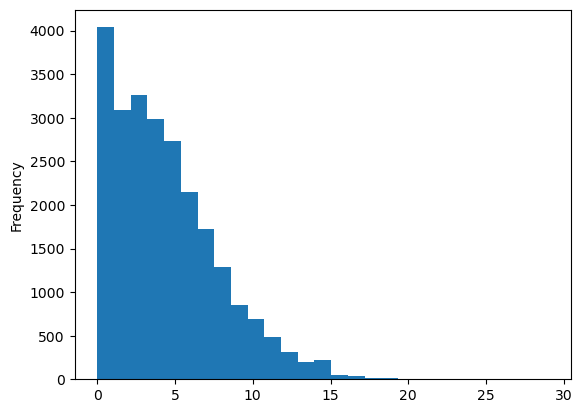

In [82]:
# Show the frequencies of different scores.
# Final Scores:
df_scores['Score_9'].plot(kind='hist',bins=27)


In [83]:
# How many unique Difference in Final Score are there
# How many unique game IDs are there?
how_many = df['delta_9'].nunique()
how_many

43

<Axes: ylabel='Frequency'>

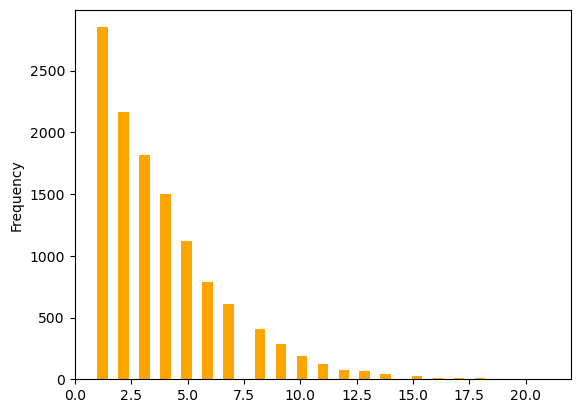

In [84]:
# Difference In Final Scores (Won by/Lost by): 
winning_df = df_scores[df_scores['W-L'] == "W"]
winning_df['delta_9'].plot(kind='hist',color='orange',bins=43)

# Training and Sets

### Data Set:  All Columns.  Build a Random Forest Model and Review Importance
This first model is just to test the data.  We know if we have the winning
scores, we should be able to predict who won and who lost perfectly.

In [85]:
# Setup X and y variables
X = df_scores.drop(columns='W-L')
y = df_scores['W-L'].values.reshape(-1,1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
X_train.describe()

,2,3,4,5,6,7,8,9,Score_1,Score_2,...,Score_9,delta_1,delta_2,delta_3,delta_4,delta_5,delta_6,delta_7,delta_8,delta_9
count,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,...,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000
mean,0.475132,0.524041,0.541079,0.541685,0.549404,0.527569,0.515163,0.354985,0.572949,1.048081,...,4.602007,0.010642,0.005073,-0.005900,-0.004907,-0.006562,0.001048,0.013068,0.013895,0.018527
std,1.011835,1.051566,1.075414,1.076928,1.080436,1.081417,1.071624,0.875252,1.086232,1.511067,...,3.267078,1.532822,2.162333,2.695608,3.158252,3.590772,3.955299,4.332830,4.688467,4.698508
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-12.000000,-13.000000,-13.000000,-17.000000,-19.000000,-19.000000,-20.000000,-24.000000,-21.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,-1.000000,-1.000000,-2.000000,-2.000000,-2.000000,-3.000000,-3.000000,-3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,...,6.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000
max,11.000000,12.000000,10.000000,13.000000,10.000000,11.000000,10.000000,10.000000,12.000000,13.000000,...,29.000000,12.000000,13.000000,14.000000,17.000000,19.000000,19.000000,20.000000,24.000000,21.000000


In [86]:
# Review Win Loss Column (Categorical)
y_train

array([['L'],
       ['L'],
       ['W'],
       ...,
       ['L'],
       ['W'],
       ['W']], dtype=object)

In [87]:
# Encode Win/Loss (Categorial Value)
# Create a OneHotEncoder
encode_y = OneHotEncoder(drop='first', sparse_output=False)
# Train the encoder
encode_y.fit(y_train)
# Apply it to both y_train and y_test
# Use np.ravel to reshape for logistic regression
y_train_encoded = np.ravel(encode_y.transform(y_train))
y_test_encoded = np.ravel(encode_y.transform(y_test))
display(y_train_encoded)
display(y_test_encoded)

array([0., 0., 1., ..., 0., 1., 1.])

array([1., 1., 0., ..., 0., 0., 1.])

In [88]:
# Create and train a Random Forest model
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train_encoded)

RandomForestClassifier(n_estimators=500)

In [89]:
# Check the model's balanced accuracy on the test set
y_test_pred = model.predict(X_test)
print(balanced_accuracy_score(y_test_encoded, y_test_pred))
# Check the model's balanced accuracy on the training set
y_train_pred = model.predict(X_train)
print(balanced_accuracy_score(y_train_encoded, y_train_pred))

1.0
1.0


Perfect!  Of course, because we have the ninth inning final scores included.

In [90]:
# Get the feature importance array
feature_importances = model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
display(importances_sorted[:10])

[(0.4200684047277451, 'delta_9'),
 (0.2212497125592358, 'delta_8'),
 (0.12307015934506736, 'delta_7'),
 (0.06868680824675413, 'delta_6'),
 (0.04653376484366384, 'delta_5'),
 (0.02963833343457966, 'Score_9'),
 (0.023323358609903626, 'Score_8'),
 (0.021224966355726564, 'delta_4'),
 (0.010818593799925285, 'Score_7'),
 (0.010090359289870674, '9')]

.40 for delta_9!  Of course, this is the final win by / lost by score.

## Winning Prediction Models:  Innings 1 through 8
The following models evalute the statistical accuracy of predicting "win" or 
"lose" after evaluate the score at the end of each inning, the runs scores in
inning, and the "ahead" or "behind" by score in each winning.

### Eight Inning Model

In [91]:
# Setup X and y.
columns_to_drop = ['9','W-L','Score_9','delta_9']
X = df_scores.drop(columns= columns_to_drop, axis=1)
y = df_scores['W-L'].values.reshape(-1,1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
display(X_train.describe())

,2,3,4,5,6,7,8,Score_1,Score_2,Score_3,...,Score_7,Score_8,delta_1,delta_2,delta_3,delta_4,delta_5,delta_6,delta_7,delta_8
count,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,...,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000
mean,0.475132,0.524041,0.541079,0.541685,0.549404,0.527569,0.515163,0.572949,1.048081,1.572122,...,3.731859,4.247022,0.010642,0.005073,-0.005900,-0.004907,-0.006562,0.001048,0.013068,0.013895
std,1.011835,1.051566,1.075414,1.076928,1.080436,1.081417,1.071624,1.086232,1.511067,1.867453,...,2.971225,3.193609,1.532822,2.162333,2.695608,3.158252,3.590772,3.955299,4.332830,4.688467
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-12.000000,-13.000000,-13.000000,-17.000000,-19.000000,-19.000000,-20.000000,-24.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,0.000000,-1.000000,-1.000000,-2.000000,-2.000000,-2.000000,-3.000000,-3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,...,5.000000,6.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,3.000000
max,11.000000,12.000000,10.000000,13.000000,10.000000,11.000000,10.000000,12.000000,13.000000,15.000000,...,29.000000,29.000000,12.000000,13.000000,14.000000,17.000000,19.000000,19.000000,20.000000,24.000000


In [92]:
# Create a OneHotEncoder for Win-Loss Column
encode_y = OneHotEncoder(drop='first', sparse_output=False)
# Train the encoder
encode_y.fit(y_train)
# Apply it to both y_train and y_test
# Use np.ravel to reshape for logistic regression
y_train_encoded = np.ravel(encode_y.transform(y_train))
y_test_encoded = np.ravel(encode_y.transform(y_test))
display(y_train_encoded)
display(y_test_encoded)

array([0., 0., 1., ..., 0., 1., 1.])

array([1., 1., 0., ..., 0., 0., 1.])

In [93]:
# Create and train a Random Forest model
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train_encoded)

RandomForestClassifier(n_estimators=500)

In [94]:
# Check the model's balanced accuracy on the test set and save score
y_test_pred = model.predict(X_test)
print(balanced_accuracy_score(y_test_encoded, y_test_pred))
bas_test_8th = balanced_accuracy_score(y_test_encoded, y_test_pred).round(3)
# Check the model's balanced accuracy on the training set
y_train_pred = model.predict(X_train)
print(balanced_accuracy_score(y_train_encoded, y_train_pred))
bas_train_8th = balanced_accuracy_score(y_train_encoded, y_train_pred).round(3)

# Get the feature importance array
feature_importances = model.feature_importances_
# List most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
display(importances_sorted[:10])

0.9467629659812394
0.989681762044556


[(0.3573469258923851, 'delta_8'),
 (0.17877323777979304, 'delta_7'),
 (0.13328045341358152, 'delta_6'),
 (0.06148227512802557, 'delta_5'),
 (0.04664246832300136, 'Score_8'),
 (0.04430816617024598, 'delta_4'),
 (0.025310639539000975, 'Score_7'),
 (0.021969721844689896, 'delta_3'),
 (0.02066803128621246, 'Score_6'),
 (0.014858334578884445, 'Score_5')]

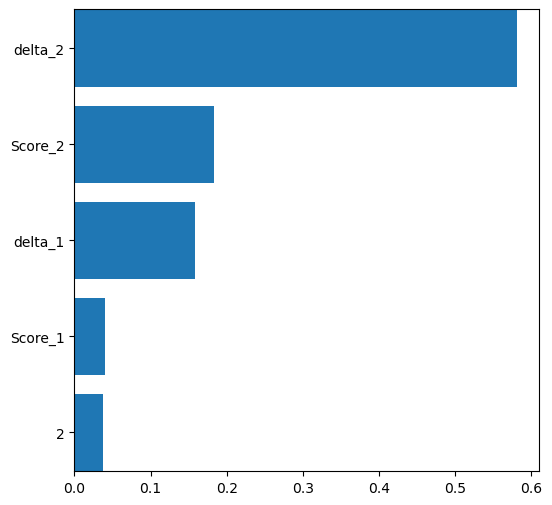

In [116]:
# Plot the feature importances
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(6,6)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [96]:
# Create Dataframe to Save Model Accuracy Scores
df_accuracy_scores = pd.DataFrame(columns=('Inning','Test_Acc_Score','Train_Acc_Score'))
row_append = {'Inning': 'Eighth','Test_Acc_Score': bas_test_8th, 'Train_Acc_Score': bas_train_8th}
df_accuracy_scores = df_accuracy_scores._append(row_append, ignore_index = True)
display(df_accuracy_scores)

C:\Users\frisb\AppData\Local\Temp\ipykernel_34144\1926326742.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_accuracy_scores = df_accuracy_scores._append(row_append, ignore_index = True)


,Inning,Test_Acc_Score,Train_Acc_Score
0,Eighth,0.947,0.99


### 7th Inning Model

In [97]:
# Setup X and y.
columns_to_drop = ['8', '9', 'W-L','Score_8', 'Score_9','delta_8', 'delta_9']
X = df_scores.drop(columns= columns_to_drop, axis=1)
y = df_scores['W-L'].values.reshape(-1,1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
display(X_train.describe())

,2,3,4,5,6,7,Score_1,Score_2,Score_3,Score_4,Score_5,Score_6,Score_7,delta_1,delta_2,delta_3,delta_4,delta_5,delta_6,delta_7
count,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.00000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000
mean,0.475132,0.524041,0.541079,0.541685,0.549404,0.527569,0.572949,1.048081,1.572122,2.113200,2.654885,3.20429,3.731859,0.010642,0.005073,-0.005900,-0.004907,-0.006562,0.001048,0.013068
std,1.011835,1.051566,1.075414,1.076928,1.080436,1.081417,1.086232,1.511067,1.867453,2.183864,2.479215,2.72383,2.971225,1.532822,2.162333,2.695608,3.158252,3.590772,3.955299,4.332830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-12.000000,-13.000000,-13.000000,-17.000000,-19.000000,-19.000000,-20.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,-1.000000,-1.000000,-2.000000,-2.000000,-2.000000,-3.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,3.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,5.00000,5.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000
max,11.000000,12.000000,10.000000,13.000000,10.000000,11.000000,12.000000,13.000000,15.000000,18.000000,22.000000,25.00000,29.000000,12.000000,13.000000,14.000000,17.000000,19.000000,19.000000,20.000000


In [98]:
# Create a OneHotEncoder for Win-Loss Column
encode_y = OneHotEncoder(drop='first', sparse_output=False)
# Train the encoder
encode_y.fit(y_train)
# Apply it to both y_train and y_test
# Use np.ravel to reshape for logistic regression
y_train_encoded = np.ravel(encode_y.transform(y_train))
y_test_encoded = np.ravel(encode_y.transform(y_test))
display(y_train_encoded)
display(y_test_encoded)

array([0., 0., 1., ..., 0., 1., 1.])

array([1., 1., 0., ..., 0., 0., 1.])

In [99]:
# Create and train a Random Forest model
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train_encoded)

RandomForestClassifier(n_estimators=500)

In [100]:
# Check the model's balanced accuracy on the test set and save score
y_test_pred = model.predict(X_test)
bas_test_7th = balanced_accuracy_score(y_test_encoded, y_test_pred).round(3)
display(bas_test_7th)
# Check the model's balanced accuracy on the training set
y_train_pred = model.predict(X_train)
bas_train_7th = balanced_accuracy_score(y_train_encoded, y_train_pred).round(3)
display(bas_train_7th)
# Get the feature importance array
feature_importances = model.feature_importances_
# List most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
display(importances_sorted[:10])

0.898

0.97

[(0.34809562754545653, 'delta_7'),
 (0.17247506685075015, 'delta_6'),
 (0.10784301574393197, 'delta_5'),
 (0.07228718146514852, 'delta_4'),
 (0.052686130281599845, 'Score_7'),
 (0.03917798222332846, 'delta_3'),
 (0.031021932820279666, 'Score_6'),
 (0.026694085537363688, 'delta_2'),
 (0.020687320137223675, 'delta_1'),
 (0.02028987109083411, '7')]

In [101]:
# Save Model Accuracy Scores to DataFrame
row_append = {'Inning': 'Seventh','Test_Acc_Score': bas_test_7th, 'Train_Acc_Score': bas_train_7th}
df_accuracy_scores = df_accuracy_scores._append(row_append, ignore_index = True)
display(df_accuracy_scores)

,Inning,Test_Acc_Score,Train_Acc_Score
0,Eighth,0.947,0.99
1,Seventh,0.898,0.97


### 6th Inning Model

In [102]:
# Setup X and y.
columns_to_drop = ['7','8','9','W-L','Score_7','Score_8','Score_9','delta_7',
    'delta_8', 'delta_9']
X = df_scores.drop(columns= columns_to_drop, axis=1)
y = df_scores['W-L'].values.reshape(-1,1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
display(X_train.describe())

,2,3,4,5,6,Score_1,Score_2,Score_3,Score_4,Score_5,Score_6,delta_1,delta_2,delta_3,delta_4,delta_5,delta_6
count,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.00000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000
mean,0.475132,0.524041,0.541079,0.541685,0.549404,0.572949,1.048081,1.572122,2.113200,2.654885,3.20429,0.010642,0.005073,-0.005900,-0.004907,-0.006562,0.001048
std,1.011835,1.051566,1.075414,1.076928,1.080436,1.086232,1.511067,1.867453,2.183864,2.479215,2.72383,1.532822,2.162333,2.695608,3.158252,3.590772,3.955299
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-12.000000,-13.000000,-13.000000,-17.000000,-19.000000,-19.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.000000,-1.000000,-1.000000,-2.000000,-2.000000,-2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,3.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,5.00000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000
max,11.000000,12.000000,10.000000,13.000000,10.000000,12.000000,13.000000,15.000000,18.000000,22.000000,25.00000,12.000000,13.000000,14.000000,17.000000,19.000000,19.000000


In [103]:
# Create a OneHotEncoder for Win-Loss Column
encode_y = OneHotEncoder(drop='first', sparse_output=False)
# Train the encoder
encode_y.fit(y_train)
# Apply it to both y_train and y_test
# Use np.ravel to reshape for logistic regression
y_train_encoded = np.ravel(encode_y.transform(y_train))
y_test_encoded = np.ravel(encode_y.transform(y_test))
display(y_train_encoded)
display(y_test_encoded)

array([0., 0., 1., ..., 0., 1., 1.])

array([1., 1., 0., ..., 0., 0., 1.])

In [104]:
# Create and train a Random Forest model
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train_encoded)

RandomForestClassifier(n_estimators=500)

In [105]:
# Check the model's balanced accuracy on the test set and save score
y_test_pred = model.predict(X_test)
bas_test_6th = balanced_accuracy_score(y_test_encoded, y_test_pred).round(3)
display(bas_test_6th)
# Check the model's balanced accuracy on the training set
y_train_pred = model.predict(X_train)
bas_train_6th = balanced_accuracy_score(y_train_encoded, y_train_pred).round(3)
display(bas_train_6th)
# Get the feature importance array
feature_importances = model.feature_importances_
# List most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
display(importances_sorted[:10])

0.84

0.934

[(0.35679506006753087, 'delta_6'),
 (0.16866040305004215, 'delta_5'),
 (0.10478852405942744, 'delta_4'),
 (0.06207711185156691, 'Score_6'),
 (0.06062456703151211, 'delta_3'),
 (0.04005935639226914, 'delta_2'),
 (0.03436306135708077, 'delta_1'),
 (0.031370253997425615, 'Score_5'),
 (0.023137342655608375, '6'),
 (0.022770957622258843, 'Score_4')]

In [106]:
# Save Model Accuracy Scores to DataFrame
row_append = {'Inning': 'Sixth','Test_Acc_Score': bas_test_6th, 'Train_Acc_Score': bas_train_6th}
df_accuracy_scores = df_accuracy_scores._append(row_append, ignore_index = True)
display(df_accuracy_scores)

,Inning,Test_Acc_Score,Train_Acc_Score
0,Eighth,0.947,0.990
1,Seventh,0.898,0.970
2,Sixth,0.840,0.934


### 5th Inning Model

In [107]:
# Setup X and y.
columns_to_drop = ['6','7','8','9','W-L','Score_6','Score_7','Score_8',
                   'Score_9','delta_6','delta_7','delta_8', 'delta_9']
X = df_scores.drop(columns= columns_to_drop, axis=1)
y = df_scores['W-L'].values.reshape(-1,1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
display(X_train.describe())

,2,3,4,5,Score_1,Score_2,Score_3,Score_4,Score_5,delta_1,delta_2,delta_3,delta_4,delta_5
count,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000
mean,0.475132,0.524041,0.541079,0.541685,0.572949,1.048081,1.572122,2.113200,2.654885,0.010642,0.005073,-0.005900,-0.004907,-0.006562
std,1.011835,1.051566,1.075414,1.076928,1.086232,1.511067,1.867453,2.183864,2.479215,1.532822,2.162333,2.695608,3.158252,3.590772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,-13.000000,-13.000000,-17.000000,-19.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,-1.000000,-2.000000,-2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,4.000000,0.000000,1.000000,1.000000,2.000000,2.000000
max,11.000000,12.000000,10.000000,13.000000,12.000000,13.000000,15.000000,18.000000,22.000000,12.000000,13.000000,14.000000,17.000000,19.000000


In [108]:
# Create a OneHotEncoder for Win-Loss Column
encode_y = OneHotEncoder(drop='first', sparse_output=False)
# Train the encoder
encode_y.fit(y_train)
# Apply it to both y_train and y_test
# Use np.ravel to reshape for logistic regression
y_train_encoded = np.ravel(encode_y.transform(y_train))
y_test_encoded = np.ravel(encode_y.transform(y_test))
display(y_train_encoded)
display(y_test_encoded)

array([0., 0., 1., ..., 0., 1., 1.])

array([1., 1., 0., ..., 0., 0., 1.])

In [109]:
# Create and train a Random Forest model
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train_encoded)

RandomForestClassifier(n_estimators=500)

In [110]:
# Check the model's balanced accuracy on the test set and save score
y_test_pred = model.predict(X_test)
bas_test_5th = balanced_accuracy_score(y_test_encoded, y_test_pred).round(3)
display(bas_test_5th)
# Check the model's balanced accuracy on the training set
y_train_pred = model.predict(X_train)
bas_train_5th = balanced_accuracy_score(y_train_encoded, y_train_pred).round(3)
display(bas_train_5th)
# Get the feature importance array
feature_importances = model.feature_importances_
# List most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
display(importances_sorted[:10])

0.79

0.876

[(0.33633425474580747, 'delta_5'),
 (0.18767488125411874, 'delta_4'),
 (0.10930477207118075, 'delta_3'),
 (0.06881299851362546, 'Score_5'),
 (0.06510398835325262, 'delta_2'),
 (0.04878802244608556, 'delta_1'),
 (0.042417871649374966, 'Score_4'),
 (0.02952040830056646, '5'),
 (0.025449695171844276, 'Score_3'),
 (0.02039086540569784, 'Score_2')]

In [111]:
# Save Model Accuracy Scores to DataFrame
row_append = {'Inning': 'Fifth','Test_Acc_Score': bas_test_5th, 'Train_Acc_Score': bas_train_5th}
df_accuracy_scores = df_accuracy_scores._append(row_append, ignore_index = True)
display(df_accuracy_scores)

,Inning,Test_Acc_Score,Train_Acc_Score
0,Eighth,0.947,0.990
1,Seventh,0.898,0.970
2,Sixth,0.840,0.934
3,Fifth,0.790,0.876


### Fourth Inning Model

In [112]:
# Setup X and y.
columns_to_drop = ['5','6','7','8','9','W-L','Score_5','Score_6','Score_7',
    'Score_8','Score_9','delta_5','delta_6','delta_7','delta_8', 'delta_9']
X = df_scores.drop(columns= columns_to_drop, axis=1)
y = df_scores['W-L'].values.reshape(-1,1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
display(X_train.describe())
# Create a OneHotEncoder for Win-Loss Column
encode_y = OneHotEncoder(drop='first', sparse_output=False)
# Train the encoder
encode_y.fit(y_train)
# Apply it to both y_train and y_test
# Use np.ravel to reshape for logistic regression
y_train_encoded = np.ravel(encode_y.transform(y_train))
y_test_encoded = np.ravel(encode_y.transform(y_test))
display(y_train_encoded)
display(y_test_encoded)
# Create and train a Random Forest model
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train_encoded)
# Check the model's balanced accuracy on the test set and save score
y_test_pred = model.predict(X_test)
bas_test_4th = balanced_accuracy_score(y_test_encoded, y_test_pred).round(3)
display(bas_test_4th)
# Check the model's balanced accuracy on the training set
y_train_pred = model.predict(X_train)
bas_train_4th = balanced_accuracy_score(y_train_encoded, y_train_pred).round(3)
display(bas_train_4th)
# Get the feature importance array
feature_importances = model.feature_importances_
# List most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
display(importances_sorted[:10])
# Save Model Accuracy Scores to DataFrame
row_append = {'Inning': 'Fourth','Test_Acc_Score': bas_test_4th, 'Train_Acc_Score': bas_train_4th}
df_accuracy_scores = df_accuracy_scores._append(row_append, ignore_index = True)
display(df_accuracy_scores)

,2,3,4,Score_1,Score_2,Score_3,Score_4,delta_1,delta_2,delta_3,delta_4
count,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000
mean,0.475132,0.524041,0.541079,0.572949,1.048081,1.572122,2.113200,0.010642,0.005073,-0.005900,-0.004907
std,1.011835,1.051566,1.075414,1.086232,1.511067,1.867453,2.183864,1.532822,2.162333,2.695608,3.158252
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,-13.000000,-13.000000,-17.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,0.000000,1.000000,1.000000,2.000000
max,11.000000,12.000000,10.000000,12.000000,13.000000,15.000000,18.000000,12.000000,13.000000,14.000000,17.000000


array([0., 0., 1., ..., 0., 1., 1.])

array([1., 1., 0., ..., 0., 0., 1.])

0.749

0.805

[(0.4000233509151874, 'delta_4'),
 (0.17692379652788934, 'delta_3'),
 (0.10094997914283574, 'delta_2'),
 (0.09688972012930787, 'Score_4'),
 (0.06514827940244526, 'delta_1'),
 (0.043324461632805365, 'Score_3'),
 (0.0326721677029228, '4'),
 (0.02747199213376193, 'Score_2'),
 (0.019662328211056127, '3'),
 (0.018674330309889926, '2')]

,Inning,Test_Acc_Score,Train_Acc_Score
0,Eighth,0.947,0.990
1,Seventh,0.898,0.970
2,Sixth,0.840,0.934
3,Fifth,0.790,0.876
4,Fourth,0.749,0.805


### Third Inning Model

In [113]:
# Setup X and y.
columns_to_drop = ['4','5','6','7','8','9','W-L','Score_4','Score_5','Score_6',
            'Score_7','Score_8','Score_9','delta_4','delta_5','delta_6',
            'delta_7','delta_8', 'delta_9']
X = df_scores.drop(columns= columns_to_drop, axis=1)
y = df_scores['W-L'].values.reshape(-1,1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
display(X_train.describe())
# Create a OneHotEncoder for Win-Loss Column
encode_y = OneHotEncoder(drop='first', sparse_output=False)
# Train the encoder
encode_y.fit(y_train)
# Apply it to both y_train and y_test
# Use np.ravel to reshape for logistic regression
y_train_encoded = np.ravel(encode_y.transform(y_train))
y_test_encoded = np.ravel(encode_y.transform(y_test))
display(y_train_encoded)
display(y_test_encoded)
# Create and train a Random Forest model
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train_encoded)
# Check the model's balanced accuracy on the test set and save score
y_test_pred = model.predict(X_test)
bas_test_3rd = balanced_accuracy_score(y_test_encoded, y_test_pred).round(3)
display(bas_test_3rd)
# Check the model's balanced accuracy on the training set
y_train_pred = model.predict(X_train)
bas_train_3rd = balanced_accuracy_score(y_train_encoded, y_train_pred).round(3)
display(bas_train_3rd)
# Get the feature importance array
feature_importances = model.feature_importances_
# List most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
display(importances_sorted[:10])
# Save Model Accuracy Scores to DataFrame
row_append = {'Inning': 'Third','Test_Acc_Score': bas_test_3rd, 'Train_Acc_Score': bas_train_3rd}
df_accuracy_scores = df_accuracy_scores._append(row_append, ignore_index = True)
display(df_accuracy_scores)

,2,3,Score_1,Score_2,Score_3,delta_1,delta_2,delta_3
count,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000
mean,0.475132,0.524041,0.572949,1.048081,1.572122,0.010642,0.005073,-0.005900
std,1.011835,1.051566,1.086232,1.511067,1.867453,1.532822,2.162333,2.695608
min,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,-13.000000,-13.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000
max,11.000000,12.000000,12.000000,13.000000,15.000000,12.000000,13.000000,14.000000


array([0., 0., 1., ..., 0., 1., 1.])

array([1., 1., 0., ..., 0., 0., 1.])

0.7

0.727

[(0.4395346879986044, 'delta_3'),
 (0.2003448751674276, 'delta_2'),
 (0.12348015380736257, 'Score_3'),
 (0.09159039852051908, 'delta_1'),
 (0.05269997666020097, 'Score_2'),
 (0.04149603747212442, '3'),
 (0.029254823556163684, 'Score_1'),
 (0.021599046817597337, '2')]

,Inning,Test_Acc_Score,Train_Acc_Score
0,Eighth,0.947,0.990
1,Seventh,0.898,0.970
2,Sixth,0.840,0.934
3,Fifth,0.790,0.876
4,Fourth,0.749,0.805
5,Third,0.700,0.727


### Second Inning Model

In [114]:
# Setup X and y.
columns_to_drop = ['3', '4', '5', '6', '7', '8', '9', 'W-L',
       'Score_3', 'Score_4', 'Score_5', 'Score_6', 'Score_7','Score_8', 
       'Score_9','delta_3', 'delta_4','delta_5', 'delta_6', 'delta_7', 
       'delta_8', 'delta_9']
X = df_scores.drop(columns= columns_to_drop, axis=1)
y = df_scores['W-L'].values.reshape(-1,1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
display(X_train.describe())
# Create a OneHotEncoder for Win-Loss Column
encode_y = OneHotEncoder(drop='first', sparse_output=False)
# Train the encoder
encode_y.fit(y_train)
# Apply it to both y_train and y_test
# Use np.ravel to reshape for logistic regression
y_train_encoded = np.ravel(encode_y.transform(y_train))
y_test_encoded = np.ravel(encode_y.transform(y_test))
display(y_train_encoded)
display(y_test_encoded)
# Create and train a Random Forest model
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train_encoded)
# Check the model's balanced accuracy on the test set and save score
y_test_pred = model.predict(X_test)
bas_test_2nd = balanced_accuracy_score(y_test_encoded, y_test_pred).round(3)
display(bas_test_2nd)
# Check the model's balanced accuracy on the training set
y_train_pred = model.predict(X_train)
bas_train_2nd = balanced_accuracy_score(y_train_encoded, y_train_pred).round(3)
display(bas_train_2nd)
# Get the feature importance array
feature_importances = model.feature_importances_
# List most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
display(importances_sorted[:10])
# Save Model Accuracy Scores to DataFrame
row_append = {'Inning': 'Second',
              'Test_Acc_Score': bas_test_2nd,'Train_Acc_Score': bas_train_2nd}
df_accuracy_scores = df_accuracy_scores._append(row_append, ignore_index = True)
display(df_accuracy_scores)

,2,Score_1,Score_2,delta_1,delta_2
count,18136.000000,18136.000000,18136.000000,18136.000000,18136.000000
mean,0.475132,0.572949,1.048081,0.010642,0.005073
std,1.011835,1.086232,1.511067,1.532822,2.162333
min,0.000000,0.000000,0.000000,-12.000000,-13.000000
25%,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,2.000000,0.000000,1.000000
max,11.000000,12.000000,13.000000,12.000000,13.000000


array([0., 0., 1., ..., 0., 1., 1.])

array([1., 1., 0., ..., 0., 0., 1.])

0.647

0.661

[(0.5817892032128151, 'delta_2'),
 (0.1826464891242247, 'Score_2'),
 (0.15820739756277744, 'delta_1'),
 (0.03994483018452722, 'Score_1'),
 (0.03741207991565549, '2')]

,Inning,Test_Acc_Score,Train_Acc_Score
0,Eighth,0.947,0.990
1,Seventh,0.898,0.970
2,Sixth,0.840,0.934
3,Fifth,0.790,0.876
4,Fourth,0.749,0.805
5,Third,0.700,0.727
6,Second,0.647,0.661


### First Inning Model

In [115]:
# Setup X and y.
columns_to_drop = ['2','3', '4', '5', '6', '7', '8', '9', 'W-L','Score_2'
       'Score_3', 'Score_4', 'Score_5', 'Score_6', 'Score_7','Score_8', 
       'Score_9','delta_2','delta_3', 'delta_4','delta_5', 'delta_6', 'delta_7', 
       'delta_8', 'delta_9']
X = df_scores.drop(columns= columns_to_drop, axis=1)
y = df_scores['W-L'].values.reshape(-1,1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
display(X_train.describe())
# Create a OneHotEncoder for Win-Loss Column
encode_y = OneHotEncoder(drop='first', sparse_output=False)
# Train the encoder
encode_y.fit(y_train)
# Apply it to both y_train and y_test
# Use np.ravel to reshape for logistic regression
y_train_encoded = np.ravel(encode_y.transform(y_train))
y_test_encoded = np.ravel(encode_y.transform(y_test))
display(y_train_encoded)
display(y_test_encoded)
# Create and train a Random Forest model
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train_encoded)
# Check the model's balanced accuracy on the test set and save score
y_test_pred = model.predict(X_test)
bas_test_1st = balanced_accuracy_score(y_test_encoded, y_test_pred).round(3)
display(bas_test_1st)
# Check the model's balanced accuracy on the training set
y_train_pred = model.predict(X_train)
bas_train_1st = balanced_accuracy_score(y_train_encoded, y_train_pred).round(3)
display(bas_train_1st)
# Get the feature importance array
feature_importances = model.feature_importances_
# List most important features
importances_sorted = sorted(zip(feature_importances, X.columns), reverse=True)
display(importances_sorted[:10])
# Save Model Accuracy Scores to DataFrame
row_append = {'Inning': 'First',
              'Test_Acc_Score': bas_test_1st,'Train_Acc_Score': bas_train_1st}
df_accuracy_scores = df_accuracy_scores._append(row_append, ignore_index = True)
display(df_accuracy_scores)

KeyError: "['Score_2Score_3'] not found in axis"

For 1st Inning Model using Scores and Lead, the model is only 60% balanced
accuracy.  This is not much better than a 50/50 guess.  